In [2]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


DB_PATH = "../../datasets/CCSMLDatabase.db"
TABLE = "master_clean"

conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query(
    f"SELECT * FROM master_clean",
    conn,
)
conn.close()

# Global style settings
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"], # Standard crisp fonts
    "axes.linewidth": 1.5,               # Thicker axis lines
    "axes.spines.top": False,            # Remove top spine
    "axes.spines.right": False,          # Remove right spine
    "xtick.major.width": 1.5,            # Match tick thickness to axis
    "ytick.major.width": 1.5,
    "xtick.direction": "out",            # Ticks point outside
    "ytick.direction": "out",
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.labelweight": "normal",
})


# Color palette for consistency
COLORS = {
    'primary': '#2c7bb6',
    'secondary': '#d7191c',
    'tertiary': '#fdae61',
    'quaternary': '#abd9e9',
    'positive': '#2ca02c',
    'negative': '#d62728',
}

n = df.shape[0]
df.columns

Index(['id', 'tag', 'name', 'pubchemId', 'adduct', 'mass', 'z', 'ccs', 'smi',
       'inchikey', 'superclass', 'class', 'subclass'],
      dtype='object')

In [4]:
#unique adducts counts 
adduct_counts = df['adduct'].value_counts()
adduct_counts
print(f"Unique adducts: {len(adduct_counts)}")

Unique adducts: 48


Text(0, 1.01, 'Dataset entry count n=62043')

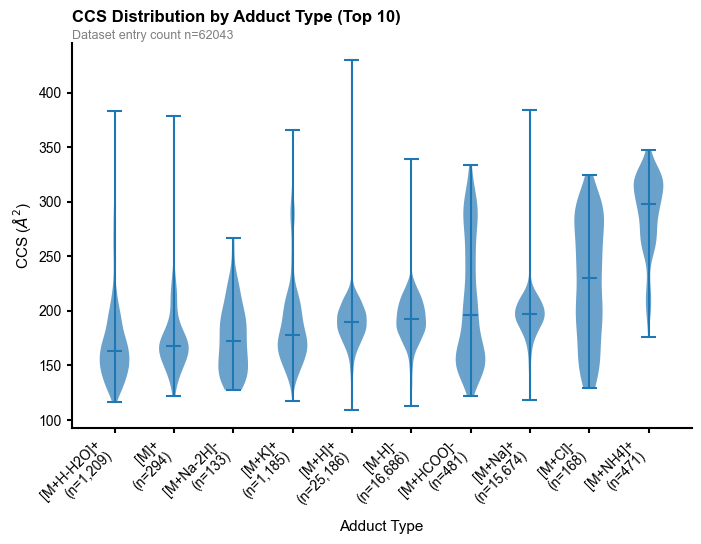

In [2]:
# Top adducts by frequency
top_adducts = df['adduct'].value_counts().head(10).index.tolist()
df_top_adducts = df[df['adduct'].isin(top_adducts)].copy()

# Violin plot of CCS by adduct
fig, ax = plt.subplots(figsize=(8, 5)) 

# Order by median CCS
order = df_top_adducts.groupby('adduct')['ccs'].median().sort_values().index

parts = ax.violinplot(
    [df_top_adducts[df_top_adducts['adduct'] == a]['ccs'].values for a in order],
    positions=range(len(order)),
    showmeans=False,
    showmedians=True
)

# Color the violins
for pc in parts['bodies']:
    pc.set_facecolor(COLORS['primary'])
    pc.set_alpha(0.7)

# Add counts as labels
counts = [len(df_top_adducts[df_top_adducts['adduct'] == a]) for a in order]
labels = [f"{a}\n(n={c:,})" for a, c in zip(order, counts)]

ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel(r'CCS ($\AA^2$)')
ax.set_xlabel('Adduct Type')

ax.set_title('CCS Distribution by Adduct Type (Top 10)', loc='left', fontweight='bold', pad=15)
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                             
        transform=ax.transAxes, fontsize=9, color='gray')

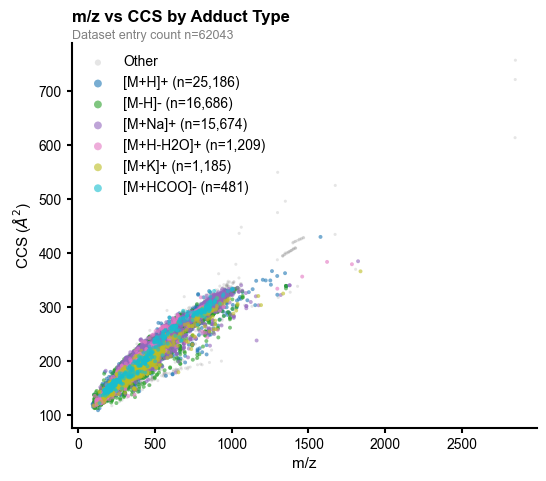

In [3]:
# m/z vs CCS colored by top adducts
fig, ax = plt.subplots(figsize=(6, 5))

# Plot 'Other' first (background)
df_other = df[~df['adduct'].isin(top_adducts[:6])]
ax.scatter(df_other['mass'], df_other['ccs'], alpha=0.2, s=5, c='gray', 
           edgecolors='none', label='Other')

# Plot top 6 adducts
colors_list = plt.cm.tab10(np.linspace(0, 1, 6))
for i, adduct in enumerate(top_adducts[:6]):
    df_adduct = df[df['adduct'] == adduct]
    ax.scatter(df_adduct['mass'], df_adduct['ccs'], alpha=0.6, s=8, 
               c=[colors_list[i]], edgecolors='none', label=f'{adduct} (n={len(df_adduct):,})')

ax.set_xlabel('m/z')
ax.set_ylabel(r'CCS ($\AA^2$)')
ax.set_title('m/z vs CCS by Adduct Type', loc='left', fontweight='bold', pad=15)
ax.text(0, 1.01, f'Dataset entry count n={n}',                                                                             
        transform=ax.transAxes, fontsize=9, color='gray')        
ax.legend(frameon=False, markerscale=2)